In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

In [3]:
print("First five rows of the dataset:")
print(df.head())

First five rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [4]:
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741 

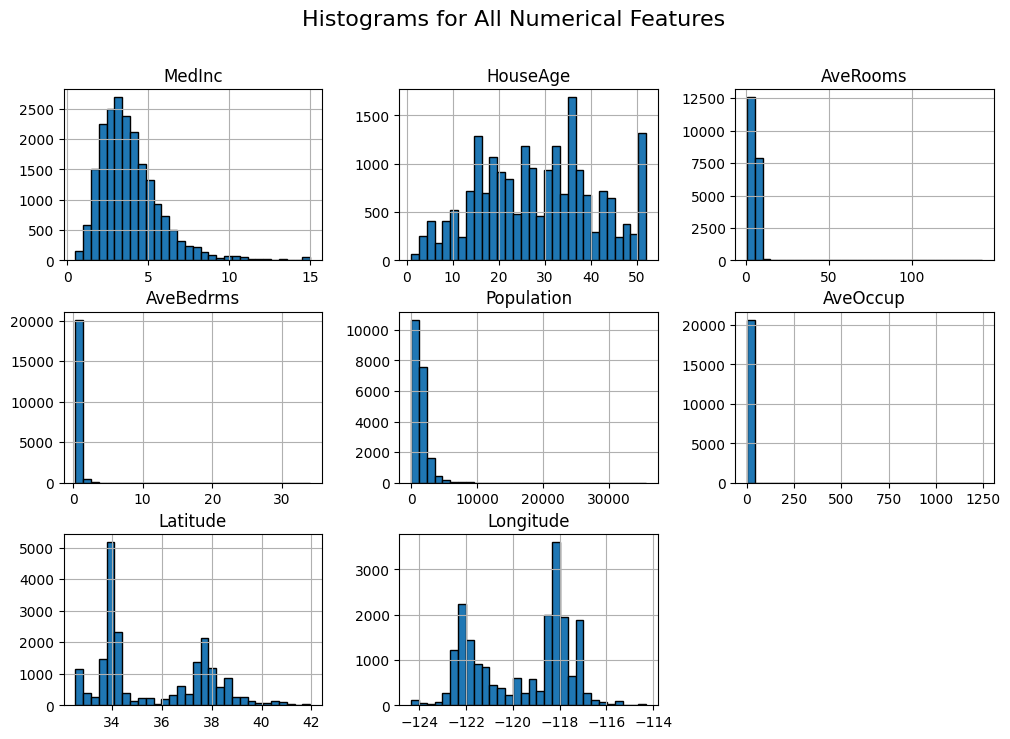

In [5]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms for All Numerical Features", fontsize=16)
plt.show()

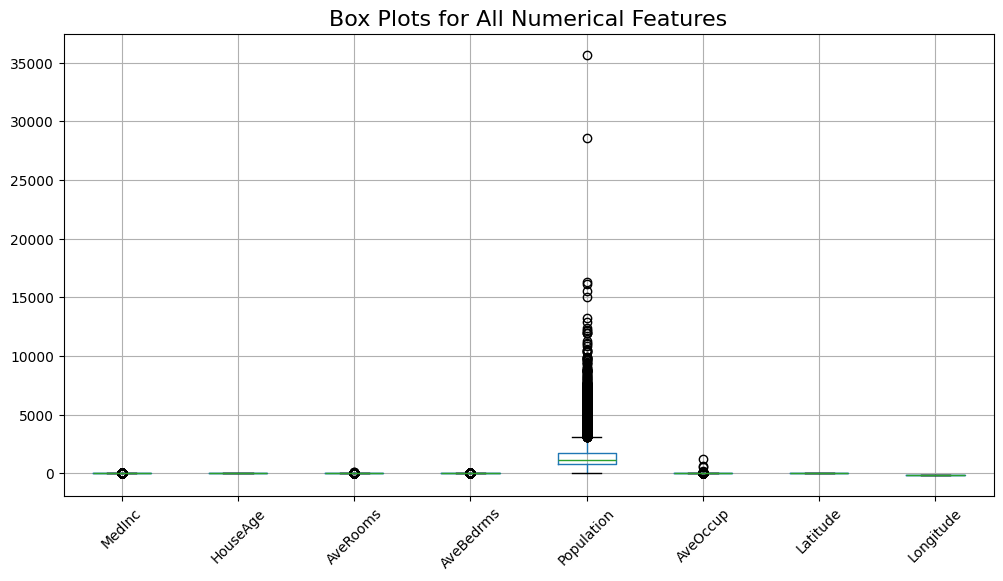

In [6]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=45) # Rotate labels for better readability
plt.title("Box Plots for All Numerical Features", fontsize=16)
plt.show()

In [7]:
Q1 = df.quantile(0.25) # 25th percentile
Q3 = df.quantile(0.75) # 75th percentile
IQR = Q3 - Q1 # Interquartile Range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("\nNumber of Outliers in Each Feature:")
print(outliers)


Number of Outliers in Each Feature:
MedInc         681
HouseAge         0
AveRooms       511
AveBedrms     1424
Population    1196
AveOccup       711
Latitude         0
Longitude        0
dtype: int64


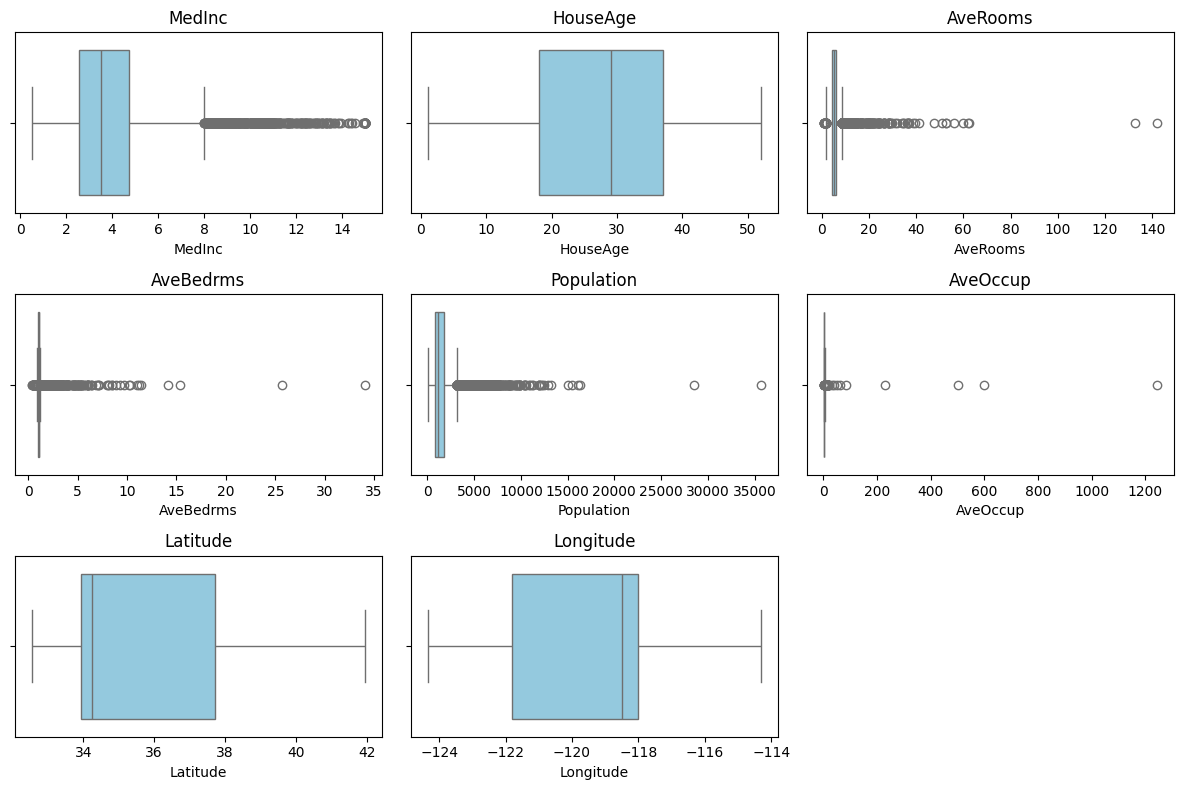

In [8]:
# 4. Generate Individual Box Plots with Outliers Highlighted
# Create box plots for each feature using seaborn
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i) # Arrange plots in a grid
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(col)
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()